<a href="https://colab.research.google.com/github/srihari-sirisipalli/Linear_Regression_Model_Project_in_Python_for_Beginners_Part_1/blob/main/Linear_Regression_Model_Project_in_Python_for_Beginners_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Data

## Load dataset

In [ ]:
# Load the California housing dataset using scikit-learn's fetch_california_housing function
cal_housing = datasets.fetch_california_housing()

# Create a DataFrame 'df' to store the dataset features and labels
# The data is loaded into the DataFrame, and the column names are set to the feature names from the dataset
df = pd.DataFrame(data=cal_housing.data, columns=cal_housing.feature_names)

# Define the target variable, which is the first target in the dataset (there can be multiple targets)
target = cal_housing.target_names[0]

# Add the target variable as a new column to the DataFrame 'df'
df[target] = cal_housing.target


## Peek into *data*

In [ ]:
# Display the first few rows of the DataFrame to get an overview of the data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Data Description

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Data Preprocessing

### Missing Data

In [ ]:
# Check for missing data
missing_data = df.isnull().sum()/len(df)
missing_data=missing_data[missing_data > 0]
# Display the columns with missing data and their respective counts
print("Columns with missing data:")
missing_data

Columns with missing data:


Series([], dtype: float64)

#### Fill the missing data

In [ ]:
for column in missing_data:
    if df[column].dtype == 'object':
        # Fill missing object columns with 'Unknown'
        df[column].fillna('Unknown', inplace=True)
    else:
        # Fill missing numerical columns with the median
        df[column].fillna(df[column].median(), inplace=True)

### Encoding Categorical Variables

In [ ]:
# Create an empty dictionary to store label encoders for each categorical column
label_encoders = {}

# Iterate through each column in the DataFrame that has data type 'object'
for column in df.select_dtypes(include=['object']).columns:

    # Create a new LabelEncoder object for the current column
    label_encoders[column] = LabelEncoder()

    # Use the LabelEncoder to transform the values in the current column to numerical labels
    df[column] = label_encoders[column].fit_transform(df[column])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Scaling or Normalizing Numerical Features

In [ ]:
# Import the StandardScaler class from the preprocessing module in scikit-learn
scaler = StandardScaler()

# Select numerical columns in the 'data' DataFrame using the select_dtypes method, excluding columns of type 'object'
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Apply the StandardScaler to the selected numerical columns in the 'data' DataFrame
# The fit_transform method computes the mean and standard deviation of each numerical feature
# and scales them so that they have a mean of 0 and a standard deviation of 1
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


### Correlation

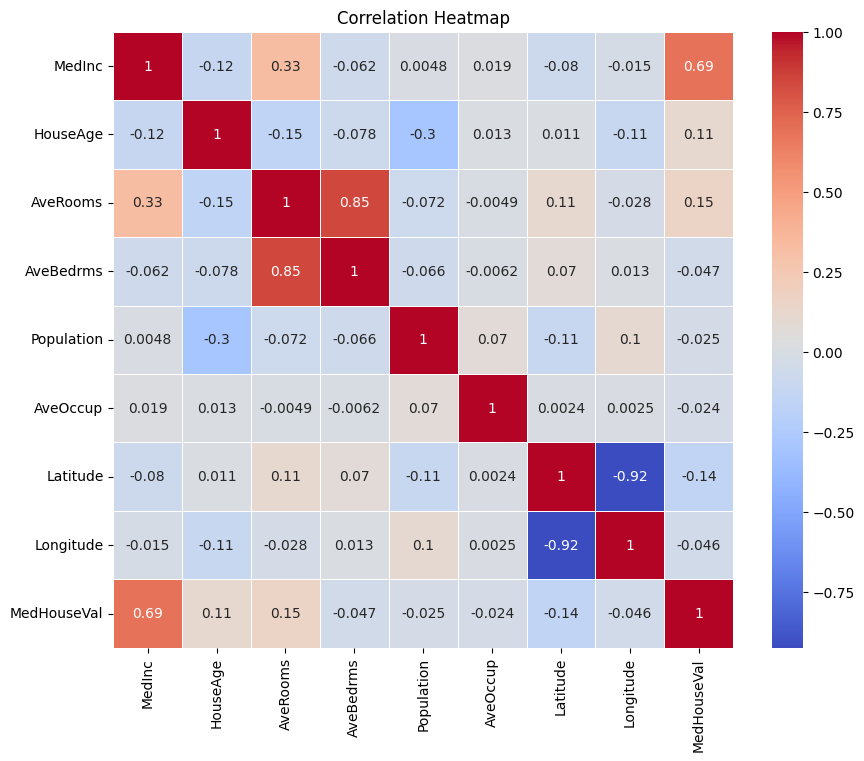

In [ ]:
# Calculate the correlation matrix for the DataFrame 'df'
correlation_matrix = df.corr()

# Create a Matplotlib figure and set its size
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed

# Create a heatmap using Seaborn, annotating the values and customizing the color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title for the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

## Define X and Y

In [ ]:
# Define a function to get features with at least a 50% correlation with the target variable
def get_features_by_correlation(df, target_feature, threshold=0.5):
    """
    Select features from a DataFrame based on their correlation with the target feature.

    Parameters:
        df (DataFrame): The input DataFrame containing features and the target.
        target_feature (str): The name of the target feature.
        threshold (float): The minimum absolute correlation value to consider. Default is 0.5.

    Returns:
        list: A list of feature names that meet the correlation criteria.
    """
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Get the absolute correlation values of features with the target feature
    feature_correlations = correlation_matrix[target_feature].abs()

    # Filter features that meet the correlation threshold
    selected_features = feature_correlations[feature_correlations >= threshold]

    # Remove the target feature from the list (if present)
    selected_features = selected_features.drop(target_feature, errors='ignore')

    # Return the names of selected features as a list
    return selected_features.index.tolist()

In [ ]:
# Let's take features which as atleast 50% correlation with target variable
selected_features = get_features_by_correlation(df, target_feature=target, threshold=0.5)
print("Selected features:", selected_features)

Selected features: ['MedInc']


In [ ]:
# Create a new DataFrame 'X' containing only the selected features by using the list of column names in 'selected_features'.
X = df[selected_features]

# Create a new Series 'Y' containing the values from the target variable by using its name stored in the 'target' variable.
Y = df[target]

### Spliting DataSet

In [ ]:
# Split the dataset into training and testing sets, typically in a 70-30 or 80-20 ratio.
# The random_state parameter is set for reproducibility.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Model

## Model Building

### Model Function

In [ ]:
# Derivation for Least Square Estimates
def simple_linear_regression(x, y):
    """
    Perform simple linear regression.

    Parameters:
    x (array-like): Independent variable (predictor) values.
    y (array-like): Dependent variable (response) values.

    Returns:
    slope (float): The slope of the regression line.
    intercept (float): The intercept of the regression line.
    """
    # Ensure x and y are NumPy arrays
    x = np.array(x)
    y = np.array(y)

    # Calculate the necessary sums
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b) of the regression line
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept

### Prediction Function

In [ ]:
def predict(slope, intercept, new_x):
    """
    Make predictions using a simple linear regression model.

    Parameters:
    slope (float): The slope of the regression line.
    intercept (float): The intercept of the regression line.
    new_x (float): New input value for prediction.

    Returns:
    predicted_y (float): The predicted value for the new input.
    """
    predicted_y = slope * new_x + intercept
    return predicted_y


## Error Function

In [ ]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error (MSE) between two arrays.

    Parameters:
    - y_true: The true values.
    - y_pred: The predicted values.

    Returns:
    - mse: The Mean Squared Error.
    """
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays must have the same length.")

    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)

    return mse

## Model Training

In [ ]:
# Calculate Slope and Intercept
slope, intercept = simple_linear_regression(X_train, Y_train)
Y_train_predict = predict(slope, intercept, X_train)
Train_error = mean_squared_error(Y_train.values,Y_train_predict.values)
# Print Slope and Intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Print MSE for train data
print(f"Mean Squared Error for Y_train : {Train_error}")


Slope: 0.02778683733923644
Intercept: 0.0004995551545277613
Mean Squared Error for Y_train : 1.0068936710538072


## Prediction on Test-Data

In [ ]:
Y_test_predict = predict(slope, intercept, X_test)

In [ ]:
test_error = mean_squared_error(Y_test.values,Y_test_predict.values)
# Print MSE for test data
print(f"Mean Squared Error for Y_test : {test_error}")

Mean Squared Error for Y_test : 0.9864884580287215
